<a href="https://colab.research.google.com/github/paoladelacruz/algaworks/blob/master/word2vec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Processamento de Linguagem Natural: Descobrindo Machado de Assis
<b> Bag of Words, TF-IDF & Word Embedding</b></font></h1>
<hr>

<h3 align=left><font size = 2, style="color:rgb(200,0,0)">
Quinta-feira, 15 de Outubro de 2020  |  18:00 - 19:00  
</font></h3>


Aprenda as principais formas de representação de dados textuais como Bag of Words,
TF IDF e Word2vec em Python e a biblioteca de processamento de linguagem natural.
Descubra ao final o quanto um texto seu se aproxima da obra do escritor Machado de
Assis.

Nosso objetivo aqui é apresentar a técnica *word embedding* criada em  2013 pela equipe da Google liderada por Tomas Mikolov empregando as bibliotecas de processamento de linguagem natural `nltk` e `gensim`. 

# Modelos tradicionais BOW e TFIDF
## Read Tweets (Documents)

Vamos empregar nos exemplos a seguir a seguinte base de Tweets: 

https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis

Eles serão nossos documentos iniciais.

## `nltk` e `gensim`

`nltk` e `gensim` são bibliotecas `python` para o processamento de linguagem natural e que implementam uma série de funções, desde de representações vetoriais (bow, tf-idf e word2vec) como também funções de similaridade, n-gramas, stemming, stopwords, concordância, segmentação, *corpus*, *teokenização* etc.

Esses pontos são explorados rapidamente aqui como o uso de presentações **BOW** e **TFIDF**. Mas na apresentação vamos diretamente para o emprego do **Word2Vec**.

In [ ]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
print ("nltk, gesim initialization ok")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
nltk, gesim initialization ok


## Acessando 37K Tweets

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://meusite.mackenzie.br/rogerio/TweetsNeutralNews.csv')
print(df.iloc[0])
print(df.shape)

id                                          1038992008461930496
tweet_text    Esquerda e direita empatam na Suécia; ultranac...
tweet_date                       Mon Sep 10 03:26:13 +0000 2018
sentiment                                                Neutro
query_used                                                 veja
Name: 0, dtype: object
(37556, 5)


## Sampling... ?

In [ ]:
# df = df.sample(1000)

## Tokenize

A tokenização é a função de separar os elementos dos documentos. Em geral empregamos palavras ou termos. Mas também podemos empregar frases.

In [ ]:
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  doc_words.append(tokens)

# remove tweet ids... //t.co/1naa40inw5
def cleanTweetIds(): 
  for i in range(len(doc_words)):
    for j in range(len(doc_words[i])):
      if doc_words[i][j].count('//') > 0:
        doc_words[i][j] = ''

  for doc in doc_words:
    if doc.count('') > 0:
      doc.remove('')  

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10]) 





doc_words[ 0 ] ['esquerda', 'e', 'direita', 'empatam', 'na', 'suécia', ';', 'ultranacionalistas', 'avançam', 'https']
doc_words[ 1 ] ['ao', 'vivo', ':', 'estadão', 'e', 'tv', 'gazeta', 'realizam', 'terceiro', 'debate']
doc_words[ 2 ] ['fotos', ':', 'apoiadores', 'de', 'jair', 'bolsonaro', 'realizam', 'atos', 'pelo', 'país']
doc_words[ 3 ] ['barroso', 'ameaça', 'barrar', 'propaganda', 'se', 'pt', 'insistir', 'em', 'mostrar', 'lula']
doc_words[ 4 ] ['serena', 'williams', 'é', 'multada', 'pelo', 'comportamento', 'durante', 'final', 'do', 'us']
doc_words[ 5 ] ['apoiadores', 'de', 'jair', 'bolsonaro', 'realizam', 'atos', 'em', 'três', 'cidades', 'https']
doc_words[ 6 ] ['villas', 'bôas', ':', '‘', 'legitimidade', 'de', 'novo', 'governo', 'pode', 'até']
doc_words[ 7 ] ['polícia', 'australiana', 'encontra', 'cinco', 'corpos', 'em', 'casa', 'de', 'perth', 'https']
doc_words[ 8 ] ['mega-sena', 'acumula', 'e', 'pagará', 'r', '$', '28', 'milhões', 'https', ':']
doc_words[ 9 ] ['jair', 'bolsonaro'

## Criando nosso Dicionário, 30K Words!

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{':': 0, ';': 1, 'avançam': 2, 'direita': 3, 'e': 4, 'empatam': 5, 'esquerda': 6, 'https': 7, 'na': 8, 'suécia': 9, 'ultranacionalistas': 10, 'ao': 11, 'debate': 12, 'estadão': 13, 'gazeta': 14, 'presidencial': 15, 'realizam': 16, 'terceiro': 17, 'tv': 18, 'vivo': 19, 'apoiadores': 20, 'atos': 21, 'bolsonaro': 22, 'de': 23, 'fotos': 24, 'jair': 25, 'país': 26, 'pelo': 27, 'ameaça': 28, 'barrar': 29, 'barroso': 30, 'candidato': 31, 'em': 32, 'insistir': 33, 'lula': 34, 'mostrar': 35, 'propaganda': 36, 'pt': 37, 'se': 38, 'comportamento': 39, 'do': 40, 'durante': 41, 'final': 42, 'multada': 43, 'open': 44, 'serena': 45, 'us': 46, 'williams': 47, 'é': 48, 'cidades': 49, 'três': 50, 'até': 51, 'bôas': 52, 'governo': 53, 'legitimidade': 54, 'novo': 55, 'pode': 56, 'questionada': 57, 'ser': 58, 'villas': 59, '‘': 60, '’': 61, 'australiana': 62, 'casa': 63, 'cinco': 64, 'corpos': 65, 'encontra': 66, 'perth': 67, 'polícia': 68, '$': 69, '28': 70, 'acumula': 71, 'mega-sena': 72, 'milhões': 73, 

In [ ]:
print(len(dictionary.token2id))

29950


## BOW de um documento

Veja aqui a representação condensada do modelo BOW.

In [ ]:
for i in range(5):
  print('doc_words[', i , ']',doc_words[i][0:10]) 
  print(dictionary.doc2bow(doc_words[i]))


doc_words[ 0 ] ['esquerda', 'e', 'direita', 'empatam', 'na', 'suécia', ';', 'ultranacionalistas', 'avançam', 'https']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
doc_words[ 1 ] ['ao', 'vivo', ':', 'estadão', 'e', 'tv', 'gazeta', 'realizam', 'terceiro', 'debate']
[(0, 2), (4, 1), (7, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]
doc_words[ 2 ] ['fotos', ':', 'apoiadores', 'de', 'jair', 'bolsonaro', 'realizam', 'atos', 'pelo', 'país']
[(0, 2), (7, 1), (16, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]
doc_words[ 3 ] ['barroso', 'ameaça', 'barrar', 'propaganda', 'se', 'pt', 'insistir', 'em', 'mostrar', 'lula']
[(0, 1), (7, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]
doc_words[ 4 ] ['serena', 'williams', 'é', 'multada', 'pelo', 'comportamento', 'durante', 'final', 'do', 'us']
[(0, 1), (7, 1), (27, 1), (39, 1), (40, 1),

### Word Cloud... termos frequentes sem significado!

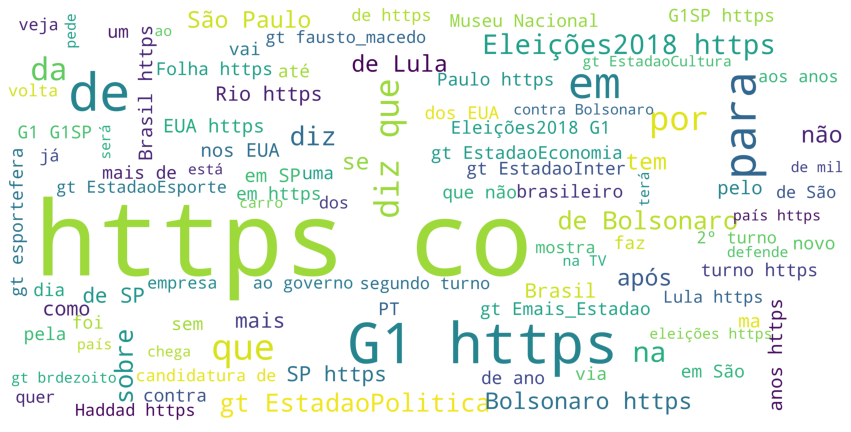

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_text = ''.join(df.tweet_text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Revisando nosso dicionário

Vamos limpar stopwords, pontuação e termos que julgamos não úteis.

### Stop words

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("portuguese"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera'

In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]  
  doc_words.append(tokens_clean)

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10]) 

doc_words[ 0 ] ['esquerda', 'direita', 'empatam', 'suécia', ';', 'ultranacionalistas', 'avançam', 'https', ':']
doc_words[ 1 ] ['vivo', ':', 'estadão', 'tv', 'gazeta', 'realizam', 'terceiro', 'debate', 'presidencial', 'https']
doc_words[ 2 ] ['fotos', ':', 'apoiadores', 'jair', 'bolsonaro', 'realizam', 'atos', 'país', 'https', ':']
doc_words[ 3 ] ['barroso', 'ameaça', 'barrar', 'propaganda', 'pt', 'insistir', 'mostrar', 'lula', 'candidato', 'https']
doc_words[ 4 ] ['serena', 'williams', 'multada', 'comportamento', 'durante', 'final', 'us', 'open', 'https', ':']
doc_words[ 5 ] ['apoiadores', 'jair', 'bolsonaro', 'realizam', 'atos', 'três', 'cidades', 'https', ':']
doc_words[ 6 ] ['villas', 'bôas', ':', '‘', 'legitimidade', 'novo', 'governo', 'pode', 'ser', 'questionada']
doc_words[ 7 ] ['polícia', 'australiana', 'encontra', 'cinco', 'corpos', 'casa', 'perth', 'https', ':']
doc_words[ 8 ] ['mega-sena', 'acumula', 'pagará', 'r', '$', '28', 'milhões', 'https', ':']
doc_words[ 9 ] ['jair', 

### Pontuação



In [ ]:
import string
print(string.punctuation)
trash = [e for e in string.punctuation]

for e in ['http','https']:
  trash.append(e)
  
print(trash)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'http', 'https']


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]  
  tokens_clean = [each for each in tokens_clean if each not in trash]  
  doc_words.append(tokens_clean)

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10]) 

doc_words[ 0 ] ['esquerda', 'direita', 'empatam', 'suécia', 'ultranacionalistas', 'avançam']
doc_words[ 1 ] ['vivo', 'estadão', 'tv', 'gazeta', 'realizam', 'terceiro', 'debate', 'presidencial']
doc_words[ 2 ] ['fotos', 'apoiadores', 'jair', 'bolsonaro', 'realizam', 'atos', 'país']
doc_words[ 3 ] ['barroso', 'ameaça', 'barrar', 'propaganda', 'pt', 'insistir', 'mostrar', 'lula', 'candidato']
doc_words[ 4 ] ['serena', 'williams', 'multada', 'comportamento', 'durante', 'final', 'us', 'open']
doc_words[ 5 ] ['apoiadores', 'jair', 'bolsonaro', 'realizam', 'atos', 'três', 'cidades']
doc_words[ 6 ] ['villas', 'bôas', '‘', 'legitimidade', 'novo', 'governo', 'pode', 'ser', 'questionada', '’']
doc_words[ 7 ] ['polícia', 'australiana', 'encontra', 'cinco', 'corpos', 'casa', 'perth']
doc_words[ 8 ] ['mega-sena', 'acumula', 'pagará', 'r', '28', 'milhões']
doc_words[ 9 ] ['jair', 'bolsonaro', '‘', 'nítida', 'melhora', 'clínica', '’', 'diz', 'novo', 'boletim']


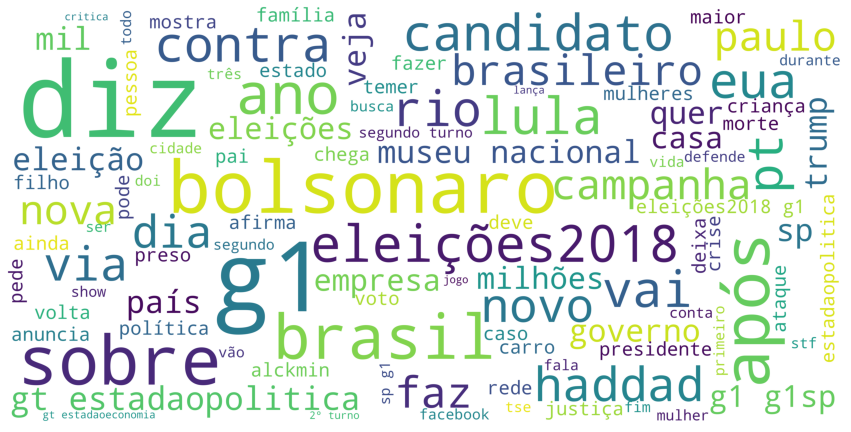

In [ ]:
from wordcloud import WordCloud

word_cloud_text = ''.join([' '.join(doc) for doc in doc_words])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Stemming

Essa transformação não aplicaremos aqui...

In [ ]:
nltk.download("rslp")

stemmer = nltk.stem.RSLPStemmer()
print(stemmer.stem('economista'))
print(stemmer.stem('economia'))
print(stemmer.stem('econômico'))




[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
econom
econom
econôm


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words_before = doc_words
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]  
  tokens_clean = [each for each in tokens_clean if each not in trash]  
  tokens_clean = [stemmer.stem(each) for each in tokens_clean]
  doc_words.append(tokens_clean)

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10]) 

doc_words = doc_words_before # voltando sem stemming  

doc_words[ 0 ] ['esquerd', 'direit', 'empat', 'suéc', 'ultranacion', 'avanç']
doc_words[ 1 ] ['viv', 'estad', 'tv', 'gazet', 'realiz', 'terc', 'debat', 'presid']
doc_words[ 2 ] ['fot', 'apoi', 'jair', 'bolsonar', 'realiz', 'ato', 'país']
doc_words[ 3 ] ['barr', 'ameaç', 'barr', 'propagand', 'pt', 'insist', 'mostr', 'lul', 'candidat']
doc_words[ 4 ] ['seren', 'will', 'mult', 'comport', 'dur', 'final', 'us', 'open']
doc_words[ 5 ] ['apoi', 'jair', 'bolsonar', 'realiz', 'ato', 'trê', 'cidad']
doc_words[ 6 ] ['vill', 'bôa', '‘', 'legitim', 'nov', 'govern', 'pod', 'ser', 'question', '’']
doc_words[ 7 ] ['políci', 'australi', 'encontr', 'cinc', 'corp', 'cas', 'perth']
doc_words[ 8 ] ['mega-sen', 'acumul', 'pag', 'r', '28', 'milhã']
doc_words[ 9 ] ['jair', 'bolsonar', '‘', 'nít', 'melhor', 'clín', '’', 'diz', 'nov', 'boletim']


## Criando nosso Novo Dicionário Clean, 29K!

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{'avançam': 0, 'direita': 1, 'empatam': 2, 'esquerda': 3, 'suécia': 4, 'ultranacionalistas': 5, 'debate': 6, 'estadão': 7, 'gazeta': 8, 'presidencial': 9, 'realizam': 10, 'terceiro': 11, 'tv': 12, 'vivo': 13, 'apoiadores': 14, 'atos': 15, 'bolsonaro': 16, 'fotos': 17, 'jair': 18, 'país': 19, 'ameaça': 20, 'barrar': 21, 'barroso': 22, 'candidato': 23, 'insistir': 24, 'lula': 25, 'mostrar': 26, 'propaganda': 27, 'pt': 28, 'comportamento': 29, 'durante': 30, 'final': 31, 'multada': 32, 'open': 33, 'serena': 34, 'us': 35, 'williams': 36, 'cidades': 37, 'três': 38, 'bôas': 39, 'governo': 40, 'legitimidade': 41, 'novo': 42, 'pode': 43, 'questionada': 44, 'ser': 45, 'villas': 46, '‘': 47, '’': 48, 'australiana': 49, 'casa': 50, 'cinco': 51, 'corpos': 52, 'encontra': 53, 'perth': 54, 'polícia': 55, '28': 56, 'acumula': 57, 'mega-sena': 58, 'milhões': 59, 'pagará': 60, 'r': 61, 'boletim': 62, 'clínica': 63, 'diz': 64, 'hospital': 65, 'melhora': 66, 'nítida': 67, 'avanço': 68, 'extrema-direita':

In [ ]:
print(len(dictionary.token2id))

29770


### BOW de um documento

In [ ]:
print(dictionary.token2id)
print(len(dictionary.token2id))

bow = []

for i in range(0,100):
  bow.append(dictionary.doc2bow(doc_words[i])) 

for i in range(-3,3):
  print('doc_words[', i , ']',bow[i]) 
  print('\n')


{'avançam': 0, 'direita': 1, 'empatam': 2, 'esquerda': 3, 'suécia': 4, 'ultranacionalistas': 5, 'debate': 6, 'estadão': 7, 'gazeta': 8, 'presidencial': 9, 'realizam': 10, 'terceiro': 11, 'tv': 12, 'vivo': 13, 'apoiadores': 14, 'atos': 15, 'bolsonaro': 16, 'fotos': 17, 'jair': 18, 'país': 19, 'ameaça': 20, 'barrar': 21, 'barroso': 22, 'candidato': 23, 'insistir': 24, 'lula': 25, 'mostrar': 26, 'propaganda': 27, 'pt': 28, 'comportamento': 29, 'durante': 30, 'final': 31, 'multada': 32, 'open': 33, 'serena': 34, 'us': 35, 'williams': 36, 'cidades': 37, 'três': 38, 'bôas': 39, 'governo': 40, 'legitimidade': 41, 'novo': 42, 'pode': 43, 'questionada': 44, 'ser': 45, 'villas': 46, '‘': 47, '’': 48, 'australiana': 49, 'casa': 50, 'cinco': 51, 'corpos': 52, 'encontra': 53, 'perth': 54, 'polícia': 55, '28': 56, 'acumula': 57, 'mega-sena': 58, 'milhões': 59, 'pagará': 60, 'r': 61, 'boletim': 62, 'clínica': 63, 'diz': 64, 'hospital': 65, 'melhora': 66, 'nítida': 67, 'avanço': 68, 'extrema-direita':

### Criando nosso 'Corpus' de Documentos

O 'Corpus' é uma base contendo todos os documentos.

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in doc_words]

In [ ]:
len(corpus) == len(doc_words)


True

### TF-IDF de um Documento

Uma representação que leva em conta a quantidade de têrmos na coleção (corpus).

$$ w_{i,j} = tf_{ij} \times log( \frac{N}{df_i} ) $$  

Novamente veja a representação compactada.

In [ ]:
tf_idf = gensim.models.TfidfModel(corpus)
# for doc in tf_idf[corpus]:
#   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

### TF-IDF dos tweets

In [ ]:
print(dictionary.token2id)
print(len(dictionary.token2id))

bow = []

for i in range(0,100):
  bow.append(dictionary.doc2bow(doc_words[i])) 

tfidf = []

for i in range(0,100):
  tfidf.append(tf_idf[bow[i]])  

for i in range(-3,3):
  print('doc_words[', i , ']',bow[i]) 
  print('doc_words[', i , ']',tfidf[i]) 
  print('\n')


{'avançam': 0, 'direita': 1, 'empatam': 2, 'esquerda': 3, 'suécia': 4, 'ultranacionalistas': 5, 'debate': 6, 'estadão': 7, 'gazeta': 8, 'presidencial': 9, 'realizam': 10, 'terceiro': 11, 'tv': 12, 'vivo': 13, 'apoiadores': 14, 'atos': 15, 'bolsonaro': 16, 'fotos': 17, 'jair': 18, 'país': 19, 'ameaça': 20, 'barrar': 21, 'barroso': 22, 'candidato': 23, 'insistir': 24, 'lula': 25, 'mostrar': 26, 'propaganda': 27, 'pt': 28, 'comportamento': 29, 'durante': 30, 'final': 31, 'multada': 32, 'open': 33, 'serena': 34, 'us': 35, 'williams': 36, 'cidades': 37, 'três': 38, 'bôas': 39, 'governo': 40, 'legitimidade': 41, 'novo': 42, 'pode': 43, 'questionada': 44, 'ser': 45, 'villas': 46, '‘': 47, '’': 48, 'australiana': 49, 'casa': 50, 'cinco': 51, 'corpos': 52, 'encontra': 53, 'perth': 54, 'polícia': 55, '28': 56, 'acumula': 57, 'mega-sena': 58, 'milhões': 59, 'pagará': 60, 'r': 61, 'boletim': 62, 'clínica': 63, 'diz': 64, 'hospital': 65, 'melhora': 66, 'nítida': 67, 'avanço': 68, 'extrema-direita':

# Word Embedding, **`word2vec`**

In [ ]:
import gensim 
from gensim.models import Word2Vec 

In [ ]:
model_CBOW = Word2Vec(doc_words, min_count=1,size= 50, workers=3, window =5, sg = 0) # sg = 0 means CBOW
model_SGRAM = Word2Vec(doc_words, min_count=1,size= 50, workers=3, window =5, sg = 1) 

In [ ]:
model_CBOW.wv.vocab.keys()

dict_keys(['esquerda', 'direita', 'empatam', 'suécia', 'ultranacionalistas', 'avançam', 'vivo', 'estadão', 'tv', 'gazeta', 'realizam', 'terceiro', 'debate', 'presidencial', 'fotos', 'apoiadores', 'jair', 'bolsonaro', 'atos', 'país', 'barroso', 'ameaça', 'barrar', 'propaganda', 'pt', 'insistir', 'mostrar', 'lula', 'candidato', 'serena', 'williams', 'multada', 'comportamento', 'durante', 'final', 'us', 'open', 'três', 'cidades', 'villas', 'bôas', '‘', 'legitimidade', 'novo', 'governo', 'pode', 'ser', 'questionada', '’', 'polícia', 'australiana', 'encontra', 'cinco', 'corpos', 'casa', 'perth', 'mega-sena', 'acumula', 'pagará', 'r', '28', 'milhões', 'nítida', 'melhora', 'clínica', 'diz', 'boletim', 'hospital', 'vai', 'urnas', 'meio', 'avanço', 'extrema-direita', 'defesa', 'pede', 'rosa', 'weber', 'tempo', 'substituir', 'brasileirão', 'flamengo', 'despacha', 'chapecoense', 'sobe', 'tabela', '', 'passou', 'meia', 'hora', 'sentado', 'andou', 'minutos', 'federal', 'anuncia', 'segurança', 'pres

In [ ]:
len(model_CBOW.wv.vocab.keys())

29770

## Doc embedding

Cada documento é representado por uma média das *word vectors* de seus termos.

In [ ]:
doc_embed = []

for doc in doc_words:
  d = np.zeros(50)
  nr_words = 0
  for word in doc:
    if word in model_CBOW.wv.vocab.keys():
      d = d + model_CBOW[word]
      nr_words = nr_words + 1
  if nr_words != 0: # avoid all words not in the vocabulary :-()    
    d = d / nr_words
  doc_embed.append(d)

print(len(doc_embed))
print(len(doc_embed[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


37556
50


## Cada documento é um vetor de dimensão 50

In [ ]:
for i in range(-2,2):
  print('doc_words[', i , ']',doc_words[i][0:10]) 
  print('doc_embed[', i , ']',doc_embed[i]) 

doc_words[ -2 ] ['daqui', 'pouco', 'g1', 'transmite', 'debate', 'candidatos', 'presidência']
doc_embed[ -2 ] [-0.3974964  -0.26319936  0.50414125 -0.09205224 -0.16088392  0.58754968
 -1.05630035 -0.97566999 -0.26734147  0.61811261 -0.55421354 -0.10162461
 -0.84863674  0.65970497 -0.01191305  0.54469821 -0.55082806  1.29005905
  0.02208856 -0.08950254 -0.53871909  0.20821992  1.04722955  0.07715
  0.25799129 -0.18706975  1.2611452   0.74924565  0.44490577 -1.2652267
 -0.18410271 -0.4322635  -1.29207996 -1.07177286  0.26278038 -0.02619628
 -0.29155835  0.23397062  0.57421849 -0.28790148  0.26967372  1.1356493
 -0.19583242 -1.04759829 -1.01757014 -0.31259078  0.67662424  0.92858538
 -0.33159068 -1.31239002]
doc_words[ -1 ] ['percentual', 'mulheres', 'eleitas', 'câmara', 'cresce', '10', '15']
doc_embed[ -1 ] [-3.07471550e-04  3.85634190e-02  1.00154499e+00 -1.23268062e-01
 -2.15866858e-01  2.01452708e-01 -7.25697108e-01 -7.31138699e-01
 -7.87441163e-01  1.45315207e-01 -3.92136825e-01 -1.21

## **Machine Learning**: Aplicando um modelo de classifição

Com essa representação podemos, por exemplo, aplicar um modelo de **Machine Learning** para fazer a classificação de Tweets. Aqui empregamos uma Árvore de Decisão para *predizer* se um Tweet é do Estadão. 

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X = doc_embed                           
y = df.query_used == 'estadao'           

# Para aplica um modelo knn
# n_neighbors = 5                                   
# clf = neighbors.KNeighborsClassifier(n_neighbors) 

seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',
                               max_depth=None,
                               random_state=seed)

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             

# Predição (Emprega o Modelo) 
y_pred = clf.predict(X_test)                        

print(y_pred)

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[False False  True ... False False False]
[[8642  602]
 [ 595 1428]]
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      9244
        True       0.70      0.71      0.70      2023

    accuracy                           0.89     11267
   macro avg       0.82      0.82      0.82     11267
weighted avg       0.89      0.89      0.89     11267



## Word Embedding Públicos

Para uma aplicação geral você pode querer empregar modelos públicos já treinados.

http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc#

Recursos vetoriais prontos para serem utilizados nas tarefas de Processamento da Linguagem Natural e Aprendizado de Máquina. O repositório traz vetores gerados a partir de um grande córpus do português do Brasil e português europeu, de fontes e gêneros variados. Foram utilizados dezessete córpus diferentes, totalizando **1,395,926,282 tokens**. O treinamento dos vetores ocorreu em algoritmos como Word2vec [1], FastText [2], Wang2vec [3] e Glove [4].



In [ ]:
# Uns 30min para executar

# !wget https://meusite.mackenzie.br/rogerio/cbow_s50/cbow_s50.txt
# model = KeyedVectors.load_word2vec_format('/content/cbow_s50.txt')

# Empregando o *Corpus* de Machado de Assis

Em vez disso vamos empregar um *Corpus* de documento menor. Vamos empregar o texto completo de **Dom Casmurro** de *Machado de Assis* e empregar nosso modelo `word2vec` para verificar a similaridade de documentos com um texto de Machado de Assis.

In [ ]:
nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [ ]:
# from http://www.nltk.org/howto/portuguese_en.html

from nltk.corpus import machado
print(machado.fileids()[0:10])
print('Número de obras de NLTK Machado: ', len(machado.fileids()))


['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt']
Número de obras de NLTK Machado:  246


In [ ]:
machado.words('romance/marm08.txt')

['Romance', ',', 'Dom', 'Casmurro', ',', '1899', 'Dom', ...]

In [ ]:
machado.raw('romance/marm08.txt')[1000:1200].replace('\n',' ')


' Os vizinhos, que não gostam dos meus hábitos reclusos e calados, deram curso à alcunha, que afinal pegou. Nem por isso me zanguei. Contei a anedota aos amigos da cidade, e eles, por graça, chamam-me '

## Criando o Modelo

In [ ]:
import gensim 
from gensim.models import Word2Vec 

doc_words = [list(machado.words('romance/marm08.txt'))]

model_SGRAM = Word2Vec(doc_words, min_count=1,size= 50, workers=3, window =8, sg = 1) 

In [ ]:
model_SGRAM.wv.vocab.keys()

dict_keys(['Romance', ',', 'Dom', 'Casmurro', '1899', 'Texto', 'de', 'referência', ':', 'Obras', 'Completas', 'Machado', 'Assis', 'vol', '.', 'I', 'Nova', 'Aguilar', 'Rio', 'Janeiro', '1994', 'Publicado', 'originalmente', 'pela', 'Editora', 'Garnier', 'CAPÍTULO', 'PRIMEIRO', 'DO', 'TÍTULO', 'Uma', 'noite', 'destas', 'vindo', 'da', 'cidade', 'para', 'o', 'Engenho', 'Novo', 'encontrei', 'no', 'trem', 'Central', 'um', 'rapaz', 'aqui', 'do', 'bairro', 'que', 'eu', 'conheço', 'vista', 'e', 'chapéu', 'Cumprimentou', '-', 'me', 'sentou', 'se', 'ao', 'pé', 'mim', 'falou', 'Lua', 'dos', 'ministros', 'acabou', 'recitando', 'versos', 'A', 'viagem', 'era', 'curta', 'os', 'pode', 'ser', 'não', 'fossem', 'inteiramente', 'maus', 'Sucedeu', 'porém', 'como', 'estava', 'cansado', 'fechei', 'olhos', 'três', 'ou', 'quatro', 'vezes', ';', 'tanto', 'bastou', 'ele', 'interrompesse', 'a', 'leitura', 'metesse', 'bolso', '\x97', 'Continue', 'disse', 'acordando', 'Já', 'acabei', 'murmurou', 'São', 'muito', 'boni

In [ ]:
len(model_SGRAM.wv.vocab.keys())

9717

## Outras funções

Assim como o `NLTK` implementa funções sobre representações BOW e TFIDF, temos também funções semelhantes para o `word2vec`. Por exemplo, abaixo, a similaridade de palavras.

Entretanto, não exploraremos aqui essas funções.

In [ ]:
emb = model_SGRAM.wv['amor']

print(emb.shape)
print(emb)

(50,)
[-0.09975443 -0.15228112  0.13842325 -0.03435783  0.09359522 -0.16579032
 -0.0417675   0.02334795  0.15295103  0.22574659  0.21515961  0.02638617
 -0.00340071  0.15916713  0.14574483  0.12615952  0.43482628  0.06888938
  0.04861469 -0.15298927 -0.03519897 -0.41105998 -0.29341996  0.04831923
 -0.16862543  0.28349707  0.24142976 -0.03398729 -0.18593751 -0.28167972
 -0.07418434 -0.16885862 -0.06961311  0.02888605  0.05784606 -0.02318995
  0.02351686 -0.1514137  -0.10288496 -0.2121287  -0.01526526 -0.06563591
  0.07311378 -0.07902132 -0.19389042  0.06862242 -0.00113163  0.01607447
  0.07759102  0.0651996 ]


In [ ]:
model_SGRAM.wv.most_similar('amor', topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lugar', 0.9992440938949585),
 ('pelos', 0.9992393255233765),
 ('Há', 0.9992377161979675),
 ('aquela', 0.99922776222229),
 ('língua', 0.9992204904556274),
 ('projetos', 0.9992194771766663),
 ('creio', 0.9991987943649292),
 ('dever', 0.9991958141326904),
 ('Casmurro', 0.9991874694824219),
 ('favor', 0.9991865158081055)]

## Comparando Textos

Vamos agora ler 3 diferentes textos e compará-los com um texto de Machado de Assis. Um texto é do mesmo autor, um outro da escritora Clarice Lispector e um terceiro um texto geral do Brasil retirado da wikipedia.

In [ ]:
import urllib.request 

docs = []

for f in ['machado.txt','machado2.txt','clarice.txt','brasil.txt']: 
  doc = ''
  for line in urllib.request.urlopen('http://meusite.mackenzie.br/rogerio/' + f):
    doc = doc + line.decode('utf-8')
  docs.append(doc.replace("\r\n", " "))

for i in range(len(docs)):
  docs[i] = docs[i].replace("\r\n", " ")

import string
print('trash...')
print(string.punctuation)
trash = [e for e in string.punctuation]  

trash...
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Machado de Assis
docs[0]

'Enganava-se o digno magistrado; o médico arranjou tudo. Uma vez empossado da licença começou logo a construir a casa. Era na Rua Nova, a mais bela rua de Itaguaí naquele tempo; tinha cinquenta janelas por lado, um pátio no centro, e numerosos cubículos para os hóspedes. Como fosse grande arabista, achou no Corão que Maomé declara veneráveis os doidos, pela consideração de que Alá lhes tira o juízo para que não pequem. A ideia pareceu-lhe bonita e profunda, e ele a fez gravar no frontispício da casa; mas, como tinha medo ao vigário, e por tabela ao bispo, atribuiu o pensamento a Benedito VII, merecendo com essa fraude, aliás pia, que o Padre Lopes lhe contasse, ao almoço, a vida daquele pontífice eminente.'

In [ ]:
# Machado de Assis 
docs[1]

'E tinha razão. De todas as vilas e arraiais vizinhos afluíam loucos à Casa Verde. Eram furiosos, eram mansos, eram monomaníacos, era toda a família dos deserdados do espírito. Ao cabo de quatro meses, a Casa Verde era uma povoação. Não bastaram os primeiros cubículos; mandou-se anexar uma galeria de mais trinta e sete. O Padre Lopes confessou que não imaginara a existência de tantos doidos no mundo, e menos ainda o inexplicável de alguns casos. Um, por exemplo, um rapaz bronco e vilão, que todos os dias, depois do almoço, fazia regularmente um discurso acadêmico, ornado de tropos, de antíteses, de apóstrofes, com seus realces de grego e latim, e suas borlas de Cícero,  Apuleio e Tertuliano. O vigário não queria acabar de crer. Quê! Um rapaz que ele vira, três meses antes, jogando peteca na rua!'

In [ ]:
# Clarisse Lispector
docs[2]

'O relógio bate 9 horas. Uma pancada alta, sonora, seguida de uma badalada suave, um eco. Depois, o silêncio. A clara mancha de sol se estende aos poucos pela relva do jardim. Vem subindo pelo muro vermelho da casa, fazendo brilhar a trepadeira em mil luzes de orvalho. Encontra uma abertura, a janela. Penetra. E apodera-se de repente do aposento, burlando a vigilância da cortina leve. Luísa continua imóvel,estendida sobre os lençóis revoltos, os cabelosespalhados no travesseiro. Um braço cá, outro lá,crucificada pela lassidão. O calor do sol e sua claridade enchem o quarto. Luísa pestaneja. Franze as sobrancelhas. Faz um trejeito com a boca. Abre os olhos, finalmente,e deixa-os parados no teto. Aos poucos o dia vai-lhe entrando pelo corpo. Ouve um ruído de folhas secas pisadas. Passos longínquos, miúdose apressados. Uma criança corre na estrada, pensa. De novo, o silêncio. Diverte-se um momento escutando-o. É absoluto,como de morte. Naturalmente porque a casa é retirada, bem isolada. M

In [ ]:
# Brasil, Wikipedia 
docs[3]

'O Brasil, um vasto país sul-americano, estende-se da Bacia Amazônica, no norte, até os vinhedos e as  gigantescas Cataratas do Iguaçu, no sul. O Rio de Janeiro, simbolizado pela sua estátua de 38 metros  de altura do Cristo Redentor, situada no topo do Corcovado, é famoso pelas movimentadas praias de  Copacabana e Ipanema, bem como pelo imenso e animado Carnaval, com desfiles de carros alegóricos,  fantasias extravagantes e samba.'

## Tokenize

In [ ]:
doc_words = [] # tokenize

for doc in docs:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in trash]  
  doc_words.append(tokens_clean)

for i in range(len(docs)):
  print('doc_words[', i , ']',doc_words[i][0:10]) 

doc_words[ 0 ] ['enganava-se', 'o', 'digno', 'magistrado', 'o', 'médico', 'arranjou', 'tudo', 'uma', 'vez']
doc_words[ 1 ] ['e', 'tinha', 'razão', 'de', 'todas', 'as', 'vilas', 'e', 'arraiais', 'vizinhos']
doc_words[ 2 ] ['o', 'relógio', 'bate', '9', 'horas', 'uma', 'pancada', 'alta', 'sonora', 'seguida']
doc_words[ 3 ] ['o', 'brasil', 'um', 'vasto', 'país', 'sul-americano', 'estende-se', 'da', 'bacia', 'amazônica']


## Embedding Docs

In [ ]:
import numpy as np

def embed(doc_words, model, size=50):

  doc_embed = []

  for doc in doc_words:
    d = np.zeros(size)
    nr_words = 0
    for word in doc:
      if word in model.wv.vocab.keys():
        d = d + model[word]
        nr_words = nr_words + 1
    if nr_words != 0: # avoid all words not in the vocabulary :-()    
      d = d / nr_words
    doc_embed.append(d)

  return doc_embed

doc_SGRAM = embed(doc_words, model_SGRAM)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


## Verificando a similaridade

[0.99998992 0.99998295 0.99991926]


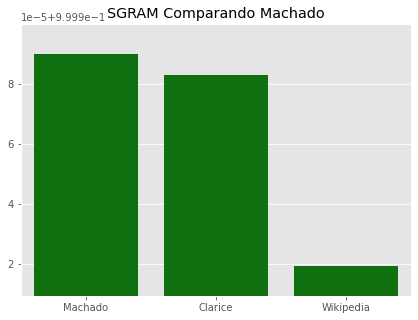

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

f = plt.figure(figsize=(7,5))
y=cosine_similarity(doc_SGRAM, doc_SGRAM)[0][1:4]
print(y)
sns.barplot(x=['Machado','Clarice','Wikipedia'],y=y,color='green')
plt.ylim(min(y)-0.00001,max(y)+0.00001)
plt.title('SGRAM Comparando Machado')
plt.show()


# Conclusão

 * **`word2vec`** representa uma alternativa eficiente e simples de representar documentos para processamento de linguagem natural e aprendizado de máquina.

 * Existem várias funções de processamento de linguagem, dessas e de outras bibliotecas, empregando **`word2vec`** e que nós não exploramos aqui. Particularmente não exploramos o uso do contexto dos termos.

 * Existem ainda diversos problemas práticos em que você pode aplicar esse modelo.


## **Aqui você um bom ponto de começo!**
## **Obrigado!** 